# Libraries

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pickle
from mpl_toolkits.mplot3d import Axes3D

# 1. Generate points

## Spiral data

$$
x = r \cdot \sin(\theta), \quad y = r \cdot \cos(\theta)
$$
$$
r = \text{radius (linear from 0 to 1)}, \quad \theta = j \cdot k + \text{noise}
$$


In [2]:
class Spiral:
    def __init__(self, n_points, n_classes, n_dimensions):        
        # initializing
        self.N = n_points  # number of points per class
        self.D = n_dimensions  # dimension
        self.K = n_classes  # number of classes
        self.P = np.zeros((self.N * self.K, self.D))  # data matrix
        self.L = np.zeros(self.N * self.K, dtype='uint8')  # class labels
        for j in range(self.K):
            ix = range(self.N * j, self.N * (j + 1))
            r = np.linspace(0.0, 1, self.N)  # radius
            t = np.linspace(j * 4, (j + 1) * 4, self.N) + np.random.randn(self.N) * 0.2  # theta
            self.P[ix] = np.c_[r * np.sin(t), r * np.cos(t)]  # assign x, y
            self.L[ix] = j  # assign labels

    def generate(self):
        return self.P, self.L

# Example usage
spiral = Spiral(n_points=100, n_classes=3, n_dimensions=2)
X, y = spiral.generate()

print("Data shape:", X.shape)  # Data shape: (300, 2)
print("Labels shape:", y.shape)  # Labels shape: (300,)


Data shape: (300, 2)
Labels shape: (300,)


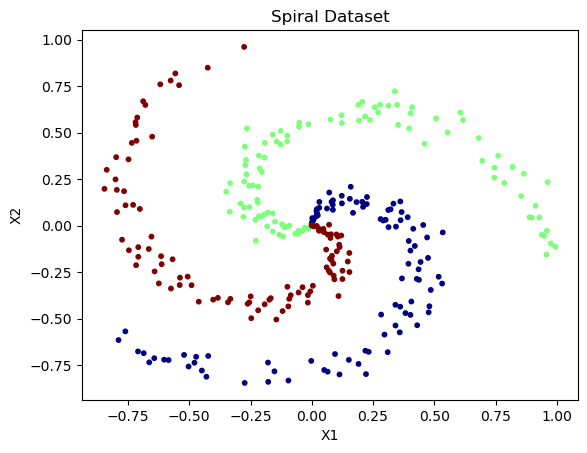

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', s=10)
plt.title("Spiral Dataset")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()


## Line data

$$
y = a \cdot x + b
$$
$$
a = \text{slope of the line}, \quad b = \text{intercept with noise}
$$


In [4]:
class Line:
    def __init__(self, n_points, n_classes, n_dimensions):        
        # initializing
        self.N = n_points  # number of points per class
        self.D = n_dimensions  # dimension
        self.K = n_classes  # number of classes
        self.P = np.zeros((self.N * self.K, self.D))  # data matrix
        self.L = np.zeros(self.N * self.K, dtype='uint8')  # class labels
        for j in range(self.K):
            a = 2 * j - 2  # slope of the line
            b = np.random.randn(self.N) * 2  # random intercept with noise
            ix = range(self.N * j, self.N * (j + 1))
            t = np.linspace(-10, 10, self.N)  # evenly spaced x values
            if self.D == 2:
                self.P[ix] = np.c_[t, a * t + b]
                self.L[ix] = j  # assign labels

    def generate(self):
        return self.P, self.L

# Example usage
line = Line(n_points=100, n_classes=3, n_dimensions=2)
X, y = line.generate()

print("Data shape:", X.shape)  # Data shape: (300, 2)
print("Labels shape:", y.shape)  # Labels shape: (300,)


Data shape: (300, 2)
Labels shape: (300,)


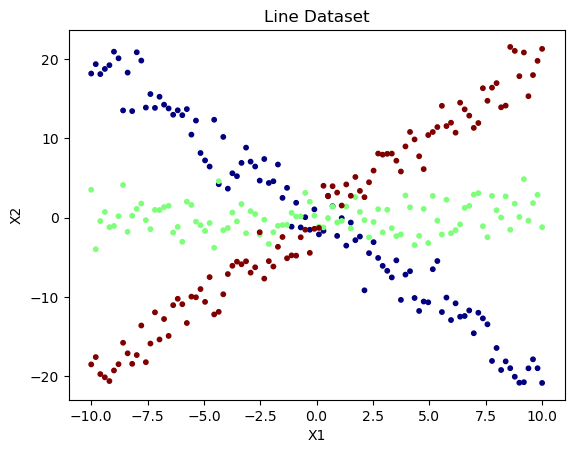

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', s=10)
plt.title("Line Dataset")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()


## Circle data

$$
x = r \cdot \sin(\theta), \quad y = r \cdot \cos(\theta)
$$
$$
r = \text{radius (different for each class, with noise)}, \quad \theta \in [0, 2\pi]
$$


In [6]:
class Circle:
    def __init__(self, n_points, n_classes, n_dimensions):        
        # initializing
        self.N = n_points  # number of points per class
        self.D = n_dimensions  # dimension
        self.K = n_classes  # number of classes
        self.P = np.zeros((self.N * self.K, self.D))  # data matrix
        self.L = np.zeros(self.N * self.K, dtype='uint8')  # class labels
        for j in range(self.K):
            ix = range(self.N * j, self.N * (j + 1))
            r = (j + 1) * 2 + np.random.randn(self.N) * 0.5  # radius with noise
            t = np.linspace(0, 2 * np.pi, self.N) + np.random.randn(self.N) * 0.2  # theta with noise
            if self.D == 2:
                self.P[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
                self.L[ix] = j  # assign labels
            else:
                raise ValueError("Only 2D data is supported in this implementation.")

    def generate(self):
        return self.P, self.L

# Example usage
circle = Circle(n_points=100, n_classes=3, n_dimensions=2)
X, y = circle.generate()

print("Data shape:", X.shape)  # Data shape: (300, 2)
print("Labels shape:", y.shape)  # Labels shape: (300,)


Data shape: (300, 2)
Labels shape: (300,)


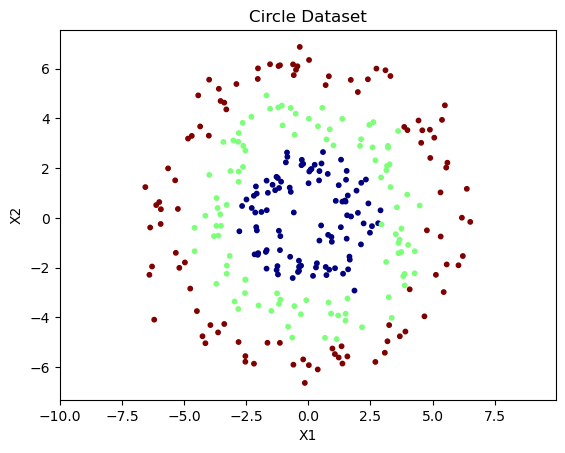

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', s=10)
plt.title("Circle Dataset")
plt.xlabel("X1")
plt.ylabel("X2")
plt.axis('equal')  # Ensure equal scaling
plt.show()


## Zone data

$$
x = a + r \cdot \sin(\theta), \quad y = b + r \cdot \cos(\theta)
$$
$$
a, b = \text{center coordinates of the zone}
$$
$$
r = \text{distance from center (with noise)}, \quad \theta \in [0, 2\pi]
$$


In [8]:
class Zone:
    def __init__(self, n_points, n_classes, n_dimensions):        
        # initializing
        self.N = n_points  # number of points per class
        self.D = n_dimensions  # dimension
        self.K = n_classes  # number of classes
        self.P = np.zeros((self.N * self.K, self.D))  # data matrix
        self.L = np.zeros(self.N * self.K, dtype='uint8')  # class labels
        pi = np.pi
        for j in range(self.K):
            theta = j * (2 * pi) / self.K  # angle for the zone
            a = np.cos(theta)  # center x-coordinate
            b = np.sin(theta)  # center y-coordinate
            ix = range(self.N * j, self.N * (j + 1))
            r = np.random.randn(self.N) * 0.5  # random radius with noise
            t = np.linspace(0, 2 * pi, self.N) + np.random.randn(self.N) * 0.2  # theta with noise
            if self.D == 2:
                self.P[ix] = np.c_[a + r * np.sin(t), b + r * np.cos(t)]
                self.L[ix] = j  # assign labels
            else:
                raise ValueError("Only 2D data is supported in this implementation.")

    def generate(self):
        return self.P, self.L

# Example usage
zone = Zone(n_points=100, n_classes=4, n_dimensions=2)
X, y = zone.generate()

print("Data shape:", X.shape)  # Data shape: (400, 2)
print("Labels shape:", y.shape)  # Labels shape: (400,)


Data shape: (400, 2)
Labels shape: (400,)


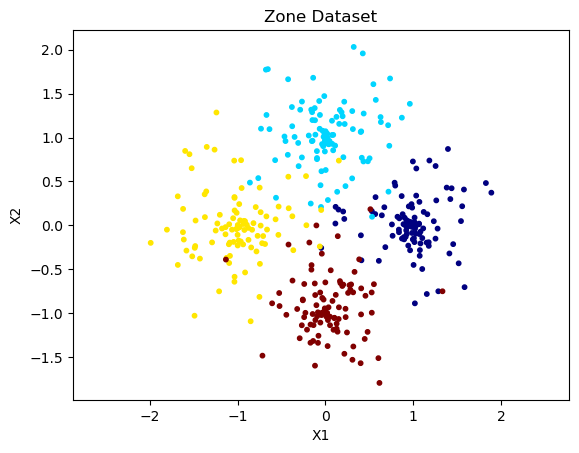

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', s=10)
plt.title("Zone Dataset")
plt.xlabel("X1")
plt.ylabel("X2")
plt.axis('equal')  # Ensure equal scaling
plt.show()


## Zone 3D data

$$
x = a + R \cdot \sin(\gamma) \cdot \cos(\theta)
$$
$$
y = b + R \cdot \sin(\gamma) \cdot \sin(\theta)
$$
$$
z = c + R \cdot \cos(\gamma)
$$
$$
a, b, c = \text{coordinates of the zone center}
$$
$$
R = \text{radius (with noise)}, \quad \gamma \in [0, \pi], \quad \theta \in [0, 2\pi]
$$


In [10]:
class Zone_3D:
    def __init__(self, n_points, n_classes, n_dimensions, centers):        
        # Initializing
        self.N = n_points  # Number of points per class
        self.D = n_dimensions  # Dimension (should be 3)
        self.K = n_classes  # Number of classes
        self.centers = centers  # List of centers for each class
        self.P = np.zeros((self.N * self.K, self.D))  # Data matrix
        self.L = np.zeros(self.N * self.K, dtype='uint8')  # Class labels
        
        for j in range(self.K):
            center = np.array(self.centers[j])  # Center for class j
            ix = range(self.N * j, self.N * (j + 1))
            
            # Generate random distances and angles
            R = np.random.randn(self.N) * 2  # Random radius with noise
            gamma = np.random.uniform(0, np.pi, self.N)  # Polar angle
            theta = np.random.uniform(0, 2 * np.pi, self.N)  # Azimuthal angle
            
            # Convert spherical coordinates to Cartesian
            x = R * np.sin(gamma) * np.cos(theta)
            y = R * np.sin(gamma) * np.sin(theta)
            z = R * np.cos(gamma)
            
            # Add center offset
            self.P[ix] = np.c_[center[0] + x, center[1] + y, center[2] + z]
            self.L[ix] = j  # Assign labels

    def generate(self):
        return self.P, self.L

# Example usage
centers = [[0, 0, 0], [5, 5, 5], [-5, -5, 5]]
zone_3d = Zone_3D(n_points=100, n_classes=3, n_dimensions=3, centers=centers)
X, y = zone_3d.generate()

print("Data shape:", X.shape)  # Data shape: (300, 3)
print("Labels shape:", y.shape)  # Labels shape: (300,)

Data shape: (300, 3)
Labels shape: (300,)


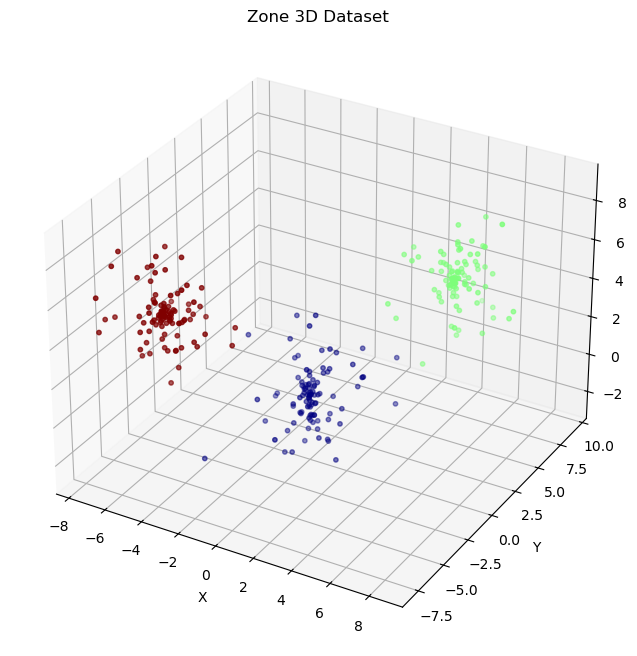

In [11]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='jet', s=10)
ax.set_title("Zone 3D Dataset")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()


Regression

In [12]:
import numpy as np

class GeneratePolynomialData:
    def __init__(self, n_points=200, coefficients=[1, -2, 3], noise_std=5):
        # n_points (int): Number of data points.
        # coefficients (list): Polynomial coefficients [a_n, ..., a_0].
        # noise_std (float): Standard deviation of added noise.
        self.n_points = n_points
        self.coefficients = coefficients
        self.noise_std = noise_std

    def generate(self):
        x = np.linspace(-10, 10, self.n_points)  # Generate evenly spaced x values
        # Compute y as the polynomial sum: y = a_n*x^n + ... + a_0
        y = sum(c * x**i for i, c in enumerate(self.coefficients[::-1]))
        # Add Gaussian noise
        y += np.random.normal(0, self.noise_std, self.n_points)
        return {"x": x, "y": y}

    def save_to_csv(self, file_name="polynomial_data.csv"):
        data = self.generate()
        # Combine x and y into a single 2D array
        combined_data = np.column_stack((data["x"], data["y"]))
        # Save as CSV
        np.savetxt(file_name, combined_data, delimiter=",", header="x,y", comments="")

    def get_init_gen(self):
        equation = " + ".join(
            [f"{c}*x^{i}" for i, c in enumerate(self.coefficients[::-1])]
        )
        print(f"Actual polynomial: {equation}")

# Usage example:
generator = GeneratePolynomialData()
generator.save_to_csv("polynomial_data.csv")
generator.get_init_gen()


Actual polynomial: 3*x^0 + -2*x^1 + 1*x^2


Actual polynomial: 5*x^0 + -2*x^1 + 0*x^2 + 3*x^3


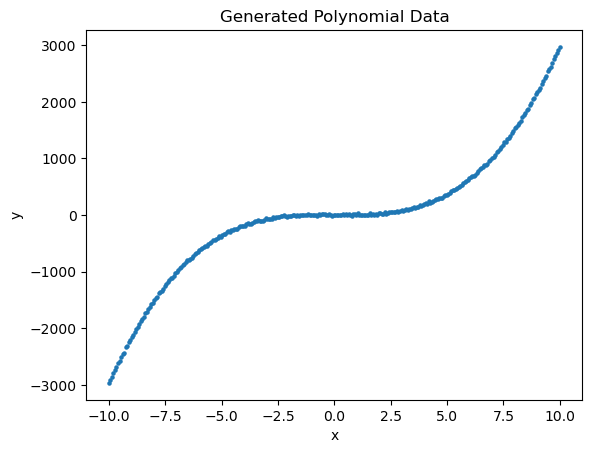

In [13]:
# Generate and save data for a cubic polynomial
generator = GeneratePolynomialData(n_points=300, coefficients=[3, 0, -2, 5], noise_std=10)
generator.save_to_csv("cubic_data.csv")
generator.get_init_gen()

data = generator.generate()
plt.scatter(data['x'], data['y'], s=5)
plt.title("Generated Polynomial Data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# 2. Loss code

## a. Base Loss (Phải chép phần calculate, forward, backward) 

In [14]:
class Loss:

    # Store references to trainable layers for regularization
    def remember_trainable_layers(self, trainable_layers):
        self.trainable_layers = trainable_layers

    # Calculate total loss (data loss + optional regularization loss)
    def calculate(self, output, y, *, include_regularization=False):
        # Calculate sample losses (data loss)
        sample_losses = self.forward(output, y)
        # Compute mean loss
        data_loss = np.mean(sample_losses)

        # If regularization loss is not requested, return only data loss
        if not include_regularization:
            return data_loss

        # Return data loss and regularization loss
        return data_loss, self.regularization_loss()

    # Regularization loss for weights and biases
    def regularization_loss(self):
        regularization_loss = 0  # Default regularization is 0

        for layer in self.trainable_layers:
            # L1 regularization for weights
            if layer.weights_regularizer_l1 > 0:
                regularization_loss += layer.weights_regularizer_l1 * np.sum(np.abs(layer.weights))
            # L2 regularization for weights
            if layer.weights_regularizer_l2 > 0:
                regularization_loss += layer.weights_regularizer_l2 * np.sum(layer.weights**2)
            # L1 regularization for biases
            if layer.biases_regularizer_l1 > 0:
                regularization_loss += layer.biases_regularizer_l1 * np.sum(np.abs(layer.biases))
            # L2 regularization for biases
            if layer.biases_regularizer_l2 > 0:
                regularization_loss += layer.biases_regularizer_l2 * np.sum(layer.biases**2)

        return regularization_loss

    # To be implemented by subclasses
    def forward(self, y_pred, y_true):
        raise NotImplementedError

    # To be implemented by subclasses
    def backward(self, dvalues, y_true):
        raise NotImplementedError


## b. Loss_CategoricalCrossentropy

**Forward Pass**:
- Sparse categorical labels:
$$
\text{Loss} = -\log(p_{\text{true class}})
$$
- One-hot encoded labels:
$$
\text{Loss} = -\sum_{j=1}^{C} y_{\text{true}, j} \cdot \log(p_j)
$$

**Backward Pass**:
$$
\frac{\partial \text{Loss}}{\partial y_{\text{pred}}} = -\frac{y_{\text{true}}}{y_{\text{pred}}}
$$

In [15]:
class Loss_CategoricalCrossentropy(Loss): 
    # Forward Pass
    def forward(self, y_pred, y_true):
        samples = len(y_pred)  # Number of samples in batch

        # Clip predictions to avoid log(0) errors
        # Ensure probabilities are in range [1e-7, 1 - 1e-7]
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        # Calculate the correct class confidence
        if len(y_true.shape) == 1:  # Sparse categorical labels (e.g., [0, 2, 1])
            # Select the probabilities of the correct class for each sample
            correct_confidence = y_pred_clipped[
                range(samples),
                y_true
            ]
        elif len(y_true.shape) == 2:  # One-hot encoded labels (e.g., [[1, 0, 0], ...])
            # Compute the dot product to extract correct class probabilities
            correct_confidence = np.sum(
                y_pred_clipped * y_true,
                axis=1
            )

        # Compute the negative log of the correct class probabilities
        negative_log_likelihoods = -np.log(correct_confidence)
        return negative_log_likelihoods
    
    # Backward pass
    def backward(self, dvalues, y_true):
        # Number of samples in the batch
        samples = len(dvalues)
        # Number of classes (from the length of the output vector of a sample)
        labels = len(dvalues[0])

        # Convert sparse categorical labels to one-hot encoding if needed
        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true]

        # Compute the gradient of the loss with respect to y_pred
        # Gradient is -y_true / y_pred
        self.dinputs = -y_true / dvalues

        # Normalize the gradient by dividing by the number of samples
        self.dinputs = self.dinputs / samples
        

## c. MSE Loss

**Forward Pass**:
$$
\text{Loss} = \frac{1}{N} \sum_{i=1}^{N} (y_{\text{true}, i} - y_{\text{pred}, i})^2
$$

**Backward Pass**:
$$
\frac{\partial \text{Loss}}{\partial y_{\text{pred}}} = -\frac{2}{N} (y_{\text{true}} - y_{\text{pred}})
$$

**Regularization Loss**:
- **L1 Regularization**:
$$
\text{L1 Loss} = \lambda \sum |w|
$$
- **L2 Regularization**:
$$
\text{L2 Loss} = \lambda \sum w^2
$$


In [16]:
class Loss_MeanSquaredError(Loss):

    # Forward pass: Compute mean squared error
    def forward(self, y_pred, y_true):
        sample_losses = np.mean((y_true - y_pred) ** 2, axis=-1)
        return sample_losses

    # Backward pass: Calculate gradients for mean squared error
    def backward(self, dvalues, y_true):
        samples = len(dvalues)  # Number of samples
        outputs = len(dvalues[0])  # Number of outputs per sample

        # Compute gradient
        self.dinputs = -2 * (y_true - dvalues) / outputs
        self.dinputs = self.dinputs / samples  # Normalize gradients

    # Regularization
    def regularization_loss(self, layer):
        # set regularization to 0 by default
        regularization_loss = 0

        for layer in self.trainable_layers:
            # Calculate L1_regularization for weights
            if (layer.weights_regularizer_l1 > 0):
                regularization_loss += layer.weights_regularizer_l1 * np.sum(np.abs(layer.weights))

            # Calculate L2_regularization for weights
            if (layer.weights_regularizer_l2 > 0):
                regularization_loss += layer.weights_regularizer_l2 * np.sum(layer.weights**2)

            # Calculate L1_regularization for biases
            if (layer.biases_regularizer_l1 > 0):
                regularization_loss += layer.biases_regularizer_l1 * np.sum(np.abs(layer.biases))

            # Calculate L2_regularization for biases
            if (layer.biases_regularizer_l2 > 0):
                regularization_loss += layer.biases_regularizer_l2 * np.sum(layer.biases**2)

        return regularization_loss


# 3. Layer

## a. Dense layer

**Forward Pass**:
$$
\text{output} = \text{inputs} \cdot \text{weights} + \text{biases}
$$

**Backward Pass**:
$$
\frac{\partial \text{Loss}}{\partial \text{weights}} = \text{inputs}^\top \cdot \text{dvalues}, \quad
\frac{\partial \text{Loss}}{\partial \text{biases}} = \sum \text{dvalues}, \quad
\frac{\partial \text{Loss}}{\partial \text{inputs}} = \text{dvalues} \cdot \text{weights}^\top
$$



In [17]:
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights with small random values
        # Shape: (n_inputs, n_neurons)
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        # Initialize biases with zeros
        # Shape: (1, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    def forward(self, inputs):
        # Save input values for use in backward pass
        self.inputs = inputs
        # Calculate the output values (forward pass)
        # Output shape: (n_samples, n_neurons)
        self.output = np.dot(inputs, self.weights) + self.biases
           
    # Backward pass
    def backward(self, dvalues):
        # Gradients with respect to weights
        # Shape: (n_inputs, n_neurons)
        self.dweights = np.dot(self.inputs.T, dvalues)
        # Gradients with respect to biases
        # Shape: (1, n_neurons)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
        # Gradients with respect to inputs
        # Shape: (n_samples, n_inputs)
        self.dinputs = np.dot(dvalues, self.weights.T)

    def get_parameters(self):
        # Return current weights and biases
        return self.weights, self.biases
    
    def set_parameters(self, weights, biases):
        # Set weights and biases from outside
        self.weights = weights
        self.biases = biases

## b. Dense Layer with Regularization

**L1 Regularization**:
$$
\text{Penalty} = \lambda \cdot \sum |\text{weights}|, \quad
\frac{\partial \text{Loss}}{\partial \text{weights}} \text{ (L1)} = \lambda \cdot \text{sign(weights)}
$$

**L2 Regularization**:
$$
\text{Penalty} = \lambda \cdot \sum \text{weights}^2, \quad
\frac{\partial \text{Loss}}{\partial \text{weights}} \text{ (L2)} = 2 \cdot \lambda \cdot \text{weights}
$$


In [18]:
class Layer_Dense_Regularization:
    def __init__(self, n_inputs, n_neurons, weights_regularizer_l1=0, weights_regularizer_l2=0, biases_regularizer_l1=0, biases_regularizer_l2=0):
        # Initialize weights with small random values
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        # Initialize biases with zeros
        self.biases = np.zeros((1, n_neurons))
        # Set regularization strengths
        self.weights_regularizer_l1 = weights_regularizer_l1  # L1 regularization for weights
        self.weights_regularizer_l2 = weights_regularizer_l2  # L2 regularization for weights
        self.biases_regularizer_l1 = biases_regularizer_l1    # L1 regularization for biases
        self.biases_regularizer_l2 = biases_regularizer_l2    # L2 regularization for biases

    # Forward pass
    def forward(self, inputs):
        # Save input values for use in backward pass
        self.inputs = inputs
        # Calculate the output values (forward pass)
        self.output = np.dot(inputs, self.weights) + self.biases
        
    # Backward pass
    def backward(self, dvalues):
        # Gradients with respect to weights
        self.dweights = np.dot(self.inputs.T, dvalues)
        # Gradients with respect to biases
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)

        # Apply L1 regularization to weights
        if self.weights_regularizer_l1 > 0:
            # Create array of ones with the same shape as weights
            dL1 = np.ones_like(self.weights)
            # Set -1 where weights are negative
            dL1[self.weights < 0] = -1
            # Add L1 gradient to the weights gradient
            self.dweights += self.weights_regularizer_l1 * dL1

        # Apply L2 regularization to weights
        if self.weights_regularizer_l2 > 0:
            # Add L2 gradient to the weights gradient
            self.dweights += 2 * self.weights_regularizer_l2 * self.weights

        # Apply L1 regularization to biases
        if self.biases_regularizer_l1 > 0:
            # Create array of ones with the same shape as biases
            dL1 = np.ones_like(self.biases)
            # Set -1 where biases are negative
            dL1[self.biases < 0] = -1
            # Add L1 gradient to the biases gradient
            self.dbiases += self.biases_regularizer_l1 * dL1

        # Apply L2 regularization to biases
        if self.biases_regularizer_l2 > 0:
            # Add L2 gradient to the biases gradient
            self.dbiases += 2 * self.biases_regularizer_l2 * self.biases

        # Gradients with respect to inputs
        self.dinputs = np.dot(dvalues, self.weights.T)

    def get_parameters(self):
        # Return current weights and biases
        return self.weights, self.biases
    
    def set_parameters(self, weights, biases):
        # Set weights and biases from outside
        self.weights = weights
        self.biases = biases

## c. Dropout layer

**Binary Mask**:
$$
\text{binary\_mask} = \text{Binomial}(n=1, p=1-\text{rate}, \text{size=inputs.shape}) / (1-\text{rate})
$$

**Forward Output**:
$$
\text{output} = \text{inputs} \cdot \text{binary\_mask}
$$

**Backward Pass**:
$$
\frac{\partial \text{Loss}}{\partial \text{inputs}} = \frac{\partial \text{Loss}}{\partial \text{outputs}} \cdot \text{binary\_mask}
$$

In [19]:
class Dense_Dropout:
    def __init__(self, rate):
        # Invert the dropout rate to get the keep probability
        self.rate = 1 - rate  # For example, rate=0.1 means keep_prob=0.9

    # Forward pass
    def forward(self, inputs):
        # Save input values for use in backward pass
        self.inputs = inputs
       
        # Generate a scaled binary mask
        # Samples from a binomial distribution (1: keep neuron, 0: drop neuron)
        self.binary_mask = np.random.binomial(1, self.rate, size=inputs.shape) / self.rate
       
        # Apply mask to inputs (drop neurons)
        self.output = inputs * self.binary_mask
        
    # Backward pass
    def backward(self, dvalues):
        # Gradient with respect to inputs
        # Only propagate gradients through neurons that were kept
        self.dinputs = dvalues * self.binary_mask

# 4. Activation code

## a. Linear activation

In [20]:
class Activation_Linear:
    # Prediction function (no change for linear activation)
    def predictions(self, outputs):
        return outputs

    # Forward Pass
    def forward(self, inputs):
        # Store inputs and output (identity function)
        self.inputs = inputs
        self.output = inputs

    # Backward Pass
    def backward(self, dvalues):
        # Gradient flows unchanged for linear activation
        self.dinputs = dvalues.copy()

## b. Sigmoid function

**Forward**: 
$$
\text{Sigmoid}(x) = \frac{1}{1 + e^{-x}}
$$
**Backward**
$$
\frac{\partial Sigmoid(x)}{\partial x} = \text{Sigmoid}(x) \cdot (1 - \text{Sigmoid}(x))
$$


In [21]:
class Activation_Sigmoid:
    # Forward pass
    def forward(self, inputs):
        # Calculate output values from input
        self.output = 1 / (1 + np.exp(-inputs))

    # Backward pass
    def backward(self, dvalues):
        # Calculate gradient
        self.dinputs = dvalues * (self.output * (1 - self.output))


## c. ReLU function 

**Forward**: 
$$
Relu(x)=
\begin{cases} 
x, & \text{nếu } x > 0 \\
0, & \text{nếu } x \leq 0
\end{cases}
$$
**Backward**
$$
\frac{\partial ReLU(x)}{\partial x} = 
\begin{cases} 
1, & \text{nếu } x > 0 \\
0, & \text{nếu } x \leq 0
\end{cases}
$$


In [22]:
class Activation_ReLU:
    # Forward pass
    def forward(self, inputs):
        # Store input values for use in backward pass
        self.inputs = inputs
        # Apply ReLU activation: set negative values to 0
        self.output = np.maximum(0, inputs)

    # Backward pass
    def backward(self, dvalues):
        # Copy gradients to avoid modifying the original array
        self.dinputs = dvalues.copy()
        # Set gradients to 0 for inputs where the input values were <= 0
        self.dinputs[self.inputs <= 0] = 0

## d. Softmax function

$$
\text{Softmax}(z_i) = \frac{\exp(z_i - z_{\max})}{\sum_{j=1}^C \exp(z_j - z_{\max})}
$$
-  $z_i$ : Logit for class i.  
-  $z_{max}$ : Maximum value in the logits for numerical stability.  
-  C : Total number of classes.  
-  $ e^{(x)} $: Natural exponential function.  


In [23]:
class Activation_SoftMax():

     # Calculate the prediction for the output
    def predictions(self, outputs):
        return(np.argmax(outputs, axis=1))

    #Forward pass:
    def forward(self,inputs):

        #Get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis = 1,keepdims=True))
        self.exp_values = exp_values

        #Normalized them for each sample
        probabilities = exp_values / np.sum(exp_values, axis = 1, keepdims=True)

        self.output = probabilities

    # Backward pass:
    def backward(self,dvalues):
        # Create uninitialized array
        self.dinputs = np.empty_like(dvalues)

        # Enumerate outputs and gradients
        for index, (single_output,single_dvalues) in enumerate(zip(self.output, dvalues)):
            # Flatten ouput array
            single_output = single_output.reshape(-1,1)
            
            # Calculate the Jacobian Matrix of the output
            jacobian_matrix = np.diagflat(single_output) - np.dot(single_output,single_output.T)

            # Calculate sample-wise gradient
            # and add it to the array of sample gradients
            self.dinputs[index] = np.dot(jacobian_matrix,single_dvalues)

## Activation softmax loss caterical cross entropy

**Softmax formula**:
$$
\text{Softmax}(z_i) = \frac{\exp(z_i)}{\sum_{j=1}^C \exp(z_j)}
$$
**Cross-Entropy Loss**:
$$
\text{Loss}_i = -\log\left(p_{\text{true class}}\right)
$$
**Mean Loss**:
$$
\text{Mean Loss} = \frac{1}{N} \sum_{i=1}^N -\log\left(p_{\text{true class}}^{(i)}\right)
$$
**Gradient of Softmax + Cross-Entropy**:
$$
\frac{\partial \text{Loss}}{\partial z_i} = \text{Softmax}(z_i) - y_i
$$


In [24]:
class Activation_Softmax_Loss_CategoricalCrossEntropy():
    # Calculate the prediction for the output
    def predictions(self, outputs):
        return outputs
    
    # Calculate the data and regulazation losses given
    # the output and the ground truth values
    def calculate(self,output,y, *, include_regularization = False):
        #Calculate sample losses:
        sample_losses = self.forward(output,y)
        #Calculate mean loss:
        data_loss = np.mean(sample_losses)

        if not include_regularization:
            return data_loss
        
        #Return loss:
        return data_loss, self.regularization_loss() 

    # Set Remember Trainable Layer
    def remember_trainable_layers(self, trainable_layers):
        self.trainable_layers = trainable_layers

    # Create activation and loss function object
    def __init__(self):
        self.activation = Activation_SoftMax()
        self.loss = Loss_CategoricalCrossentropy()

    # Forward pass
    def forward(self, inputs, y_true):
        # Output layer's activation function
        self.activation.forward(inputs)

        # Set the output
        self.output = self.activation.output

        # Calculate and return loss value
        return self.loss.calculate(self.output, y_true)
    
    # Backward pass
    def backward(self, dvalues, y_true):
        # number of samples
        samples = len(dvalues)

        #if labels are one-hot encoded, turn them into discrete values
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis =1)

        # Copy to safely modify
        self.dinputs = dvalues.copy()
        # Calculate gradients
        self.dinputs[range(samples), y_true] -= 1
        # Normalize gradients
        self.dinputs = self.dinputs / samples


    # Regularization
    def regularization_loss(self):
        # set regularization to 0 by default
        regularization_loss = 0

        for layer in self.trainable_layers:
            # Calculate L1_regularization for weights
            if (layer.weights_regularizer_l1 > 0):
                regularization_loss += layer.weights_regularizer_l1 * np.sum(np.abs(layer.weights))

            # Calculate L2_regularization for weights
            if (layer.weights_regularizer_l2 > 0):
                regularization_loss += layer.weights_regularizer_l2 * np.sum(layer.weights**2)

            # Calculate L1_regularization for biases
            if (layer.biases_regularizer_l1 > 0):
                regularization_loss += layer.biases_regularizer_l1 * np.sum(np.abs(layer.biases))

            # Calculate L2_regularization for biases
            if (layer.biases_regularizer_l2 > 0):
                regularization_loss += layer.biases_regularizer_l2 * np.sum(layer.biases**2)

        return regularization_loss

# 5. Optimizer

## a. Learning rate decay

$$
\text{current\_learning\_rate} = \text{learning\_rate} \cdot \frac{1}{1 + \text{decay} \cdot \text{iterations}}
$$
- $ \text{current\_learning\_rate} $: The adjusted learning rate.
- $ \text{learning\_rate} $: The initial learning rate.
- $ \text{decay} $: The decay factor.
- $ \text{iterations} $: The number of iterations.


## b. Stochastic Gradient Descent

$$
\textbf{Vanilla Gradient Descent:} \quad
W_{t+1} = W_t - \alpha \nabla W_t
$$

- $ W_t $: Current weights at step $ t $.
- $ W_{t+1} $: Updated weights at step $ t+1 $.
- $ \alpha $: Learning rate (step size).
- $ \nabla W_t $: Gradient of the weights at step $ t $.



**Update Weights**:
$$
\text{weights} = \text{weights} - \text{current\_learning\_rate} \cdot \text{dweights}
$$

**Update Biases**:
$$
\text{biases} = \text{biases} - \text{current\_learning\_rate} \cdot \text{dbiases}
$$

In [25]:
class Optimizer_SGD:
    # Initialize optimizer with learning rate and decay
    def __init__(self, learning_rate=1., decay=0.):
        # Initial learning rate
        self.learning_rate = learning_rate
        # Current learning rate (adjusted for decay)
        self.current_learning_rate = learning_rate
        # Decay factor for learning rate
        self.decay = decay
        # Counter for the number of parameter updates
        self.iterations = 0

    # Call before any parameter updates
    def pre_update_params(self):
        # If decay is enabled, adjust the current learning rate
        if self.decay:
            self.current_learning_rate = self.learning_rate * \
                (1. / (1. + self.decay * self.iterations))

    # Update parameters
    def update_params(self, layer):
        # Update weights using gradient descent formula
        layer.weights += -self.current_learning_rate * layer.dweights
        # Update biases using gradient descent formula
        layer.biases += -self.current_learning_rate * layer.dbiases

    # Call after any parameter updates
    def post_update_params(self):
        # Increment the iteration counter after each update
        self.iterations += 1


## c. Momentum

$$
\textbf{Momentum Update:} \quad 
V_{t+1} = \beta V_t + (1 - \beta) \nabla W_t
$$

$$
\textbf{Nesterov Accelerated Gradient (NAG):} \quad 
V_{t+1} = \beta V_t + \alpha \nabla (W_t - \beta V_t)
$$


-  $ V_t $: Velocity at step $ t $.
-  $ \beta $: Momentum coefficient.
-  $ \nabla W_t $: Gradient of the weights at step $ t $.
-  $ W_t $: Current weights.
- $ \alpha $: Learning rate (step size).



In [26]:
class Optimizer_SGD:
    # Initialize optimizer with learning rate, decay, and momentum
    def __init__(self, learning_rate=1., decay=0., momentum=0.):
        # Initial learning rate
        self.learning_rate = learning_rate
        # Current learning rate (adjusted for decay)
        self.current_learning_rate = learning_rate
        # Decay rate for learning rate
        self.decay = decay
        # Counter for the number of parameter updates
        self.iterations = 0
        # Momentum factor (0 means no momentum)
        self.momentum = momentum

    # Prepares for parameter updates by adjusting the learning rate
    def pre_update_params(self):
        # If decay is enabled, adjust the current learning rate
        if self.decay:
            self.current_learning_rate = self.learning_rate * \
                (1. / (1. + self.decay * self.iterations))

    # Update the parameters of the given layer
    def update_params(self, layer):
        # Check if momentum is enabled
        if self.momentum:
            # If the layer does not already have momentum arrays, create them
            if not hasattr(layer, 'weight_momentums'):
                # Initialize momentum arrays with zeros
                layer.weight_momentums = np.zeros_like(layer.weights)
                layer.bias_momentums = np.zeros_like(layer.biases)

            # Calculate weight updates using momentum
            weight_updates = self.momentum * layer.weight_momentums - \
                             self.current_learning_rate * layer.dweights
            # Store the current weight updates in the momentum array
            layer.weight_momentums = weight_updates

            # Calculate bias updates using momentum
            bias_updates = self.momentum * layer.bias_momentums - \
                           self.current_learning_rate * layer.dbiases
            # Store the current bias updates in the momentum array
            layer.bias_momentums = bias_updates

        # If no momentum is used, perform vanilla SGD updates
        else:
            # Weight updates are directly proportional to the gradient
            weight_updates = -self.current_learning_rate * layer.dweights
            # Bias updates are directly proportional to the gradient
            bias_updates = -self.current_learning_rate * layer.dbiases

        # Update weights and biases using the calculated updates
        layer.weights += weight_updates
        layer.biases += bias_updates

    # Increment the iteration counter after each update
    def post_update_params(self):
        self.iterations += 1

## Adagrad

$$
\textbf{Cache Update:} \quad V_t = V_{t-1} + \nabla W_t^2
$$

$$
\textbf{Parameter Update:} \quad W_{t+1} = W_t - \frac{\alpha \nabla W_t}{\sqrt{V_t + \epsilon}}
$$

- $ V_t $: Cumulative sum of squared gradients at step $ t $.
- $ \nabla W_t $: Gradient of the weights at step $ t $.
- $ W_t $: Current weights at step $ t $.
- $ W_{t+1} $: Updated weights at step $ t+1 $.
- $ \alpha $: Learning rate.
- $ \epsilon $: Small value to prevent division by zero.



In [27]:
import numpy as np

# Adagrad optimizer
class Optimizer_Adagrad:
    # Initialize optimizer with learning rate, decay, and epsilon
    def __init__(self, learning_rate=1., decay=0., epsilon=1e-7):
        self.learning_rate = learning_rate  # Initial learning rate
        self.current_learning_rate = learning_rate  # Adjusted learning rate
        self.decay = decay  # Learning rate decay factor
        self.iterations = 0  # Number of parameter updates
        self.epsilon = epsilon  # Small value to prevent division by zero

    # Prepare for parameter updates (adjust learning rate if decay is used)
    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * \
                (1. / (1. + self.decay * self.iterations))

    # Update parameters of the layer
    def update_params(self, layer):
        # If cache arrays are not initialized, create them as zeros
        if not hasattr(layer, 'weight_cache'):
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.biases)

        # Update cache with squared gradients
        layer.weight_cache += layer.dweights**2
        layer.bias_cache += layer.dbiases**2

        # Adjust weights and biases with Adagrad update rule
        layer.weights += -self.current_learning_rate * \
            layer.dweights / \
            (np.sqrt(layer.weight_cache) + self.epsilon)
        layer.biases += -self.current_learning_rate * \
            layer.dbiases / \
            (np.sqrt(layer.bias_cache) + self.epsilon)

    # Increment the iteration counter after each update
    def post_update_params(self):
        self.iterations += 1


## RMSProp

$$
\textbf{Cache Update:} \quad V_{t+1} = \beta V_t + (1 - \beta) \nabla W_t^2
$$

$$
\textbf{Parameter Update:} \quad W_{t+1} = W_t - \frac{\alpha \nabla W_t}{\sqrt{V_{t+1} + \epsilon}}
$$

- $ V_{t+1} $: Cumulative sum of squared gradients with exponential weighting at step $ t+1 $.
- $ \nabla W_t $: Gradient of the weights at step $ t $.
- $ W_t $: Current weights at step $ t $.
- $ W_{t+1} $: Updated weights at step $ t+1 $.
- $ \alpha $: Learning rate.
- $ \beta $: Smoothing factor (default is 0.9).
- $ \epsilon $: Small value to prevent division by zero.



In [28]:
class Optimizer_RMSprop:
    # Initialize optimizer with learning rate, decay, epsilon, and rho
    def __init__(self, learning_rate=0.001, decay=0., epsilon=1e-7, rho=0.9):
        self.learning_rate = learning_rate  # Initial learning rate
        self.current_learning_rate = learning_rate  # Adjusted learning rate after decay
        self.decay = decay  # Decay factor for learning rate
        self.iterations = 0  # Number of parameter updates
        self.epsilon = epsilon  # Small value to prevent division by zero
        self.rho = rho  # Smoothing factor for cache updates

    # Prepares for parameter updates (adjust learning rate if decay is enabled)
    def pre_update_params(self):
        if self.decay:
            # Adjust the learning rate based on decay and iteration count
            self.current_learning_rate = self.learning_rate * \
                (1. / (1. + self.decay * self.iterations))

    # Update the parameters of a layer
    def update_params(self, layer):
        # If cache arrays are not initialized, create them as zeros
        if not hasattr(layer, 'weight_cache'):
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.biases)

        # Update the cache using the exponentially weighted average of squared gradients
        layer.weight_cache = self.rho * layer.weight_cache + \
                             (1 - self.rho) * layer.dweights**2
        layer.bias_cache = self.rho * layer.bias_cache + \
                           (1 - self.rho) * layer.dbiases**2

        # Update weights and biases with normalization by the square root of the cache
        layer.weights += -self.current_learning_rate * \
                         layer.dweights / \
                         (np.sqrt(layer.weight_cache) + self.epsilon)
        layer.biases += -self.current_learning_rate * \
                        layer.dbiases / \
                        (np.sqrt(layer.bias_cache) + self.epsilon)

    # Increment the iteration counter after parameter updates
    def post_update_params(self):
        self.iterations += 1


## Adam

$$
\textbf{First Moment Estimate:} \quad m_t = \beta_1 \cdot m_{t-1} + (1 - \beta_1) \cdot g_t
$$

$$
\textbf{Second Moment Estimate:} \quad v_t = \beta_2 \cdot v_{t-1} + (1 - \beta_2) \cdot g_t^2
$$

$$
\textbf{Bias-Corrected First Moment:} \quad \hat{m}_t = \frac{m_t}{1 - \beta_1^t}
$$

$$
\textbf{Bias-Corrected Second Moment:} \quad \hat{v}_t = \frac{v_t}{1 - \beta_2^t}
$$

$$
\textbf{Parameter Update Rule:} \quad \theta_t = \theta_{t-1} - \frac{\eta}{\sqrt{\hat{v}_t} + \epsilon} \cdot \hat{m}_t
$$


- $ m_t $: First moment estimate (momentum) at step $ t $.
- $ v_t $: Second moment estimate (cache) at step $ t $.
- $ g_t $: Gradient at step $ t $.
- $ \beta_1, \beta_2 $: Exponential decay rates for the first and second moment estimates.
- $ \eta $: Learning rate.
- $ \epsilon $: Small constant to prevent division by zero.
- $ \theta_t $: Parameter value at step $ t $.



In [29]:
class Optimizer_Adam:
    # Initialize optimizer with learning rate, decay, epsilon, beta_1, and beta_2
    def __init__(self, learning_rate=0.001, decay=0., epsilon=1e-7, beta_1=0.9, beta_2=0.999):
        self.learning_rate = learning_rate  # Initial learning rate
        self.current_learning_rate = learning_rate  # Adjusted learning rate after decay
        self.decay = decay  # Decay factor for learning rate
        self.iterations = 0  # Number of parameter updates
        self.epsilon = epsilon  # Small value to prevent division by zero
        self.beta_1 = beta_1  # Decay rate for the first moment (momentum)
        self.beta_2 = beta_2  # Decay rate for the second moment (cache)

    # Prepare for parameter updates (adjust learning rate if decay is enabled)
    def pre_update_params(self):
        if self.decay:
            # Adjust the learning rate based on decay and iteration count
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))

    # Update the parameters of a layer
    def update_params(self, layer):
        # If cache arrays are not initialized, create them as zeros
        if not hasattr(layer, 'weight_cache'):
            layer.weight_momentums = np.zeros_like(layer.weights)
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_momentums = np.zeros_like(layer.biases)
            layer.bias_cache = np.zeros_like(layer.biases)

        # Update the momentum for weights and biases using the gradients
        layer.weight_momentums = self.beta_1 * layer.weight_momentums + (1 - self.beta_1) * layer.dweights
        layer.bias_momentums = self.beta_1 * layer.bias_momentums + (1 - self.beta_1) * layer.dbiases

        # Compute bias-corrected momentums (for weights and biases)
        weight_momentums_corrected = layer.weight_momentums / (1 - self.beta_1 ** (self.iterations + 1))
        bias_momentums_corrected = layer.bias_momentums / (1 - self.beta_1 ** (self.iterations + 1))

        # Update the cache with squared gradients for weights and biases
        layer.weight_cache = self.beta_2 * layer.weight_cache + (1 - self.beta_2) * layer.dweights**2
        layer.bias_cache = self.beta_2 * layer.bias_cache + (1 - self.beta_2) * layer.dbiases**2

        # Compute bias-corrected caches (for weights and biases)
        weight_cache_corrected = layer.weight_cache / (1 - self.beta_2 ** (self.iterations + 1))
        bias_cache_corrected = layer.bias_cache / (1 - self.beta_2 ** (self.iterations + 1))

        # Update weights and biases using Adam update rule
        layer.weights += -self.current_learning_rate * weight_momentums_corrected / (np.sqrt(weight_cache_corrected) + self.epsilon)
        layer.biases += -self.current_learning_rate * bias_momentums_corrected / (np.sqrt(bias_cache_corrected) + self.epsilon)

    # Increment the iteration counter after parameter updates
    def post_update_params(self):
        self.iterations += 1

# 6. Visualize data

## Images

In [30]:
def visualize(images, labels, predictions=None, num_samples=10):
    # Select random indices for visualization
    indices = np.random.choice(len(images), num_samples, replace=False)
    images = images[indices]
    labels = labels[indices]
    predictions = predictions[indices] if predictions is not None else None

    # Define the grid size
    grid_size = int(np.ceil(np.sqrt(num_samples)))

    # Create the figure
    plt.figure(figsize=(10, 10))
    for i in range(num_samples):
        plt.subplot(grid_size, grid_size, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap="gray")
        title = f"True: {labels[i]}"
        if predictions is not None:
            title += f"\nPred: {predictions[i]}"
        plt.title(title)
        plt.axis("off")
    plt.tight_layout()
    plt.show()

# 7. Accuracy 

a. Base Accuracy (Phải chép)

In [31]:
class Accuracy:
    # General method to calculate accuracy
    def calculate(self, predictions, y):
        # Compare predictions with ground truth labels
        comparisons = self.compare(predictions, y)
        # Calculate mean accuracy
        accuracy = np.mean(comparisons)
        return accuracy


## b. Regression Accuracy:


$$
\text{Accuracy}_{\text{Regression}} = \frac{\sum_{i=1}^N \left( \lvert \hat{y}_i - y_i \rvert < \text{precision} \right)}{N}
$$

$$
\text{Precision} = \frac{\sigma(y)}{250}
$$
- $ \hat{y}_i $: Predicted value.
- $ y_i $: True value.
- $ \sigma(y) $: Standard deviation of the true values.

In [32]:
class Accuracy_Regression(Accuracy):
    def __init__(self):
        # Precision value for regression (tolerance for error)
        self.precision = None

    # Initialize precision value based on standard deviation of targets
    def init(self, y, reinit=False):
        if self.precision is None or reinit:
            # Precision is a small fraction of the standard deviation
            self.precision = np.std(y) / 250

    # Compare predictions to the targets within the prec    ision threshold
    def compare(self, predictions, y):
        return np.absolute(predictions - y) < self.precision


## c. Categorical Accuracy:


$$
\text{Accuracy}_{\text{Categorical}} = \frac{\sum_{i=1}^N \left( \hat{y}_i = y_i \right)}{N}
$$
- $ \hat{y}_i $: Predicted class ($ \text{argmax of softmax outputs} $).
- $ y_i $: True class. If $ y $ is one-hot encoded, convert it to class indices.


In [33]:

class Accuracy_Categorical(Accuracy):
    # Initialization not needed for categorical accuracy
    def init(self, y):
        pass

    # Compare predictions to true labels for classification tasks
    def compare(self, predictions, y):
        # Convert softmax outputs to class predictions
        predictions = np.argmax(predictions, axis=1)
        # If true labels are one-hot encoded, convert to class indices
        if len(y.shape) == 2:
            y = np.argmax(y, axis=1)
        # Return boolean array where predictions match the true labels
        return predictions == y


# 8. Model 

**Forward Pass**:
$$
\text{Output}_\text{layer} = f(\text{Input}_\text{layer} \cdot \text{Weights}_\text{layer} + \text{Biases}_\text{layer})
$$

**Backward Pass**:
$$
\frac{\partial \text{Loss}}{\partial \text{Weights}_\text{layer}} = \text{Inputs}_\text{layer}^T \cdot \frac{\partial \text{Loss}}{\partial \text{Output}_\text{layer}}
$$
$$
\frac{\partial \text{Loss}}{\partial \text{Inputs}_\text{layer}} = \frac{\partial \text{Loss}}{\partial \text{Output}_\text{layer}} \cdot \text{Weights}_\text{layer}^T
$$

**Loss Calculation**:
$$
\text{Loss} = \text{Data Loss} + \text{Regularization Loss}
$$

**Accuracy**:
$$
\text{Accuracy} = \frac{\text{Correct Predictions}}{\text{Total Samples}}
$$


In [34]:
class Input_Layer:
    # Forward pass for input layer
    def forward(self, inputs):
        # Simply set the input as the output
        self.output = inputs
        
# Model Class
class Model:
    def __init__(self):
        # Initialize an empty list for layers
        self.layers = []
    # Add a layer to the model
    def add(self, layer):
        self.layers.append(layer)

    # Set loss, optimizer, and accuracy objects for the model
    def set(self, *, loss, optimizer, accuracy):
        self.loss = loss
        self.optimizer = optimizer
        self.accuracy = accuracy

    # Finalize the model by setting connections between layers
    def finalize(self):
        # Create an input layer
        self.input_layer = Input_Layer()

        # Count the number of layers in the model
        layers_count = len(self.layers)

        # Initialize the list of trainable layers
        self.trainable_layers = []

        # Connect layers
        for i in range(layers_count):
            if i == 0:  # First layer
                self.layers[i].previous = self.input_layer
                self.layers[i].next = self.layers[i + 1]
            elif i < (layers_count - 1):  # Intermediate layers
                self.layers[i].previous = self.layers[i - 1]
                self.layers[i].next = self.layers[i + 1]
            else:  # Last layer
                self.layers[i].previous = self.layers[i - 1]
                self.layers[i].next = self.loss
                self.output_layer_activation = self.layers[i]

            # Add trainable layers (layers with weights)
            if hasattr(self.layers[i], 'weights'):
                self.trainable_layers.append(self.layers[i])

        # Pass trainable layers to the loss object
        self.loss.remember_trainable_layers(self.trainable_layers)

    # Perform forward pass through the model
    def forward(self, X):
        # Forward pass through the input layer
        self.input_layer.forward(X)

        # Forward pass through each layer in the model
        for layer in self.layers:
            layer.forward(layer.previous.output)

        # Return the output of the last layer
        return layer.output

    # Perform backward pass through the model
    def backward(self, output, y):
        # Backward pass through the loss
        self.loss.backward(output, y)

        # Backward pass through each layer in reverse order
        for layer in reversed(self.layers):
            layer.backward(layer.next.dinputs)

    # Train the model
    def train(self, X, y, validation_data=None, epochs=1, print_every=1):
        # Initialize accuracy calculation
        self.accuracy.init(y)

        # Main training loop
        for epoch in range(1, epochs + 1):
            # Forward pass
            output = self.forward(X)

            # Calculate loss
            data_loss, regularization_loss = self.loss.calculate(
                output, y, include_regularization=True)
            loss = data_loss + regularization_loss

            # Calculate predictions and accuracy
            predictions = self.output_layer_activation.predictions(output)
            accuracy = self.accuracy.calculate(predictions, y)

            # Backward pass
            self.backward(output, y)

            # Update parameters using optimizer
            self.optimizer.pre_update_params()
            for layer in self.trainable_layers:
                self.optimizer.update_params(layer)
            self.optimizer.post_update_params()

            # Print epoch information
            if not epoch % print_every:
                print(f'epoch: {epoch},  '
                      f'acc: {accuracy:.3f},  '
                      f'loss: {loss:.3f},  '
                      f'LR: {self.optimizer.current_learning_rate:.3f}')

        # Validation
        if validation_data is not None:
            # Forward pass on validation data
            output = self.forward(validation_data[0])
            loss = self.loss.calculate(
                output, validation_data[1], include_regularization=False)
            predictions = self.output_layer_activation.predictions(output)
            accuracy = self.accuracy.calculate(predictions, validation_data[1])

            # Print validation results
            print(f'validation, accuracy: {accuracy:.3f}, loss: {loss:.3f}')

    # Get parameters of all trainable layers
    def get_parameters(self):
        parameters = []
        for layer in self.trainable_layers:
            parameters.append(layer.get_parameters())
        return parameters

    # Set parameters for all trainable layers
    def set_parameters(self, parameters):
        for parameters_set, layer in zip(parameters, self.trainable_layers):
            layer.set_parameters(*parameters_set)

    # Save model parameters to a file
    def save_parameters(self, path):
        with open(path, 'wb') as f:
            pickle.dump(self.get_parameters(), f)

    # Load model parameters from a file
    def load_parameters(self, path):
        with open(path, 'rb') as f:
            self.set_parameters(pickle.load(f))


# 9. Train 

## a. Regression

Epoch 0, Loss: 0.9999
Epoch 10, Loss: 0.3796
Epoch 20, Loss: 0.0444
Epoch 30, Loss: 0.0227
Epoch 40, Loss: 0.0243
Epoch 50, Loss: 0.0102
Epoch 60, Loss: 0.0087
Epoch 70, Loss: 0.0074
Epoch 80, Loss: 0.0061
Epoch 90, Loss: 0.0056
Epoch 100, Loss: 0.0054
Epoch 110, Loss: 0.0053
Epoch 120, Loss: 0.0052
Epoch 130, Loss: 0.0051
Epoch 140, Loss: 0.0051
Epoch 150, Loss: 0.0051
Epoch 160, Loss: 0.0050
Epoch 170, Loss: 0.0050
Epoch 180, Loss: 0.0050
Epoch 190, Loss: 0.0050


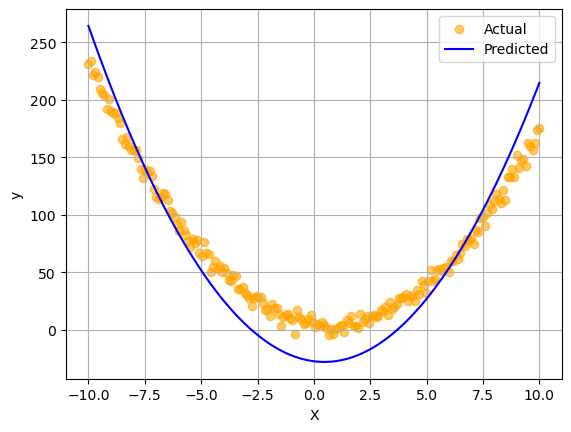

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Dense layer implementation
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)  # Initialize weights
        self.biases = np.zeros((1, n_neurons))  # Initialize biases

    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.dot(inputs, self.weights) + self.biases  # Linear transformation

    def backward(self, dvalues):
        self.dweights = np.dot(self.inputs.T, dvalues)  # Weight gradients
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)  # Bias gradients
        self.dinputs = np.dot(dvalues, self.weights.T)  # Input gradients


# ReLU activation function
class Activation_ReLU:
    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.maximum(0, inputs)  # Apply ReLU

    def backward(self, dvalues):
        self.dinputs = dvalues.copy()
        self.dinputs[self.inputs <= 0] = 0  # Zero gradient for negative inputs


# Mean Squared Error Loss function
class Loss_MeanSquaredError:
    def forward(self, y_pred, y_true):
        return np.mean((y_pred - y_true) ** 2)  # Calculate MSE

    def backward(self, dvalues, y_true):
        samples = len(dvalues)
        self.dinputs = -2 * (y_true - dvalues) / samples  # Gradient calculation


# Adam optimizer
class Optimizer_Adam:
    def __init__(self, learning_rate=0.001, decay=0., epsilon=1e-7, beta_1=0.9, beta_2=0.999):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        self.beta_1 = beta_1
        self.beta_2 = beta_2

    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate / (1 + self.decay * self.iterations)

    def update_params(self, layer):
        if not hasattr(layer, 'weight_cache'):
            layer.weight_momentums = np.zeros_like(layer.weights)
            layer.bias_momentums = np.zeros_like(layer.biases)
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.biases)

        # Update momentum
        layer.weight_momentums = self.beta_1 * layer.weight_momentums + (1 - self.beta_1) * layer.dweights
        layer.bias_momentums = self.beta_1 * layer.bias_momentums + (1 - self.beta_1) * layer.dbiases

        # Corrected momentum
        weight_momentums_corrected = layer.weight_momentums / (1 - self.beta_1 ** (self.iterations + 1))
        bias_momentums_corrected = layer.bias_momentums / (1 - self.beta_1 ** (self.iterations + 1))

        # Update cache
        layer.weight_cache = self.beta_2 * layer.weight_cache + (1 - self.beta_2) * layer.dweights ** 2
        layer.bias_cache = self.beta_2 * layer.bias_cache + (1 - self.beta_2) * layer.dbiases ** 2

        # Corrected cache
        weight_cache_corrected = layer.weight_cache / (1 - self.beta_2 ** (self.iterations + 1))
        bias_cache_corrected = layer.bias_cache / (1 - self.beta_2 ** (self.iterations + 1))

        # Parameter update
        layer.weights -= self.current_learning_rate * weight_momentums_corrected / (np.sqrt(weight_cache_corrected) + self.epsilon)
        layer.biases -= self.current_learning_rate * bias_momentums_corrected / (np.sqrt(bias_cache_corrected) + self.epsilon)

    def post_update_params(self):
        self.iterations += 1

class GeneratePolynomialData:
    def __init__(self, n_points=200, coefficients=[1, -2, 3], noise_std=5):
        # n_points (int): Number of data points.
        # coefficients (list): Polynomial coefficients [a_n, ..., a_0].
        # noise_std (float): Standard deviation of added noise.
        self.n_points = n_points
        self.coefficients = coefficients
        self.noise_std = noise_std

    def generate(self):
        x = np.linspace(-10, 10, self.n_points)  # Generate evenly spaced x values
        # Compute y as the polynomial sum: y = a_n*x^n + ... + a_0
        y = sum(c * x**i for i, c in enumerate(self.coefficients[::-1]))
        # Add Gaussian noise
        y += np.random.normal(0, self.noise_std, self.n_points)
        return {"x": x, "y": y}

    def save_to_csv(self, file_name="polynomial_data.csv"):
        data = self.generate()
        # Combine x and y into a single 2D array
        combined_data = np.column_stack((data["x"], data["y"]))
        # Save as CSV
        np.savetxt(file_name, combined_data, delimiter=",", header="x,y", comments="")

    def get_init_gen(self):
        equation = " + ".join(
            [f"{c}*x^{i}" for i, c in enumerate(self.coefficients[::-1])]
        )
        print(f"Actual polynomial: {equation}")

# Load data from CSV
def load_polynomial_data(file_name="polynomial_data.csv"):
    # Load the data from a CSV file
    data = np.loadtxt(file_name, delimiter=",", skiprows=1)  # Skip the header row
    x, y = data[:, 0], data[:, 1]  # Split into x and y arrays
    return {"x": x, "y": y}


# Normalize data
def normalize_data(X, y):
    X_mean, X_std = np.mean(X, axis=0), np.std(X, axis=0)
    y_mean, y_std = np.mean(y), np.std(y)
    return (X - X_mean) / X_std, (y - y_mean) / y_std, X_mean, X_std, y_mean, y_std


# Train and visualize results
def train_neural_network(X, y, degree=2, epochs=100, learning_rate=0.01):
    X_poly = np.hstack([X**i for i in range(1, degree + 1)])
    X_poly, y, X_mean, X_std, y_mean, y_std = normalize_data(X_poly, y)

    dense1 = Layer_Dense(X_poly.shape[1], 64)
    activation1 = Activation_ReLU()
    dense2 = Layer_Dense(64, 1)
    loss_function = Loss_MeanSquaredError()
    optimizer = Optimizer_Adam(learning_rate=learning_rate)

    for epoch in range(epochs):
        dense1.forward(X_poly)
        activation1.forward(dense1.output)
        dense2.forward(activation1.output)

        loss = loss_function.forward(dense2.output, y)
        loss_function.backward(dense2.output, y)

        dense2.backward(loss_function.dinputs)
        activation1.backward(dense2.dinputs)
        dense1.backward(activation1.dinputs)

        optimizer.pre_update_params()
        optimizer.update_params(dense1)
        optimizer.update_params(dense2)
        optimizer.post_update_params()

        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")

    return dense1, dense2, X_mean, X_std, y_mean, y_std


# Visualization function
def visualize_results(X, y, dense1, dense2, X_mean, X_std, y_mean, y_std):
    X_poly = np.hstack([X**i for i in range(1, 3)])
    X_poly = (X_poly - X_mean) / X_std

    dense1.forward(X_poly)
    dense2.forward(dense1.output)

    y_pred = dense2.output * y_std + y_mean

    plt.scatter(X, y, label="Actual", color="orange", alpha=0.6)
    plt.plot(np.sort(X), y_pred[np.argsort(X[:, 0])], color="blue", label="Predicted")
    plt.legend()
    plt.xlabel("X")
    plt.grid()
    plt.ylabel("y")
    plt.show()


# Generate data and train the model
generator = GeneratePolynomialData(coefficients=[2, -3, 5])
generator.save_to_csv()
data = load_polynomial_data()
X, y = data["x"].reshape(-1, 1), data["y"].reshape(-1, 1)  # Corrected here
dense1, dense2, X_mean, X_std, y_mean, y_std = train_neural_network(X, y, epochs=200)
visualize_results(X, y, dense1, dense2, X_mean, X_std, y_mean, y_std)


## b. Spiral 

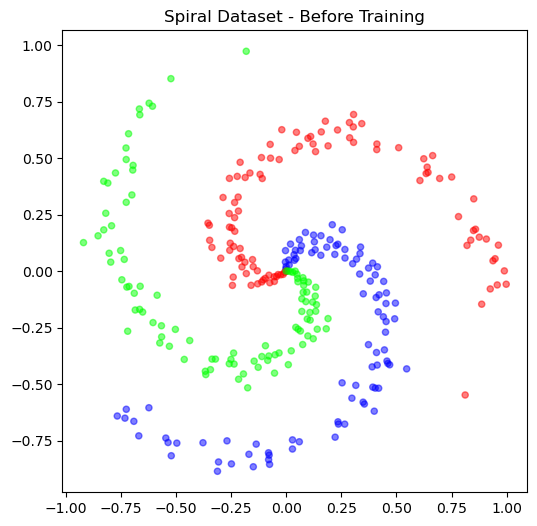

epoch: 0, acc: 0.277, loss: 1.099, lr: 0.02


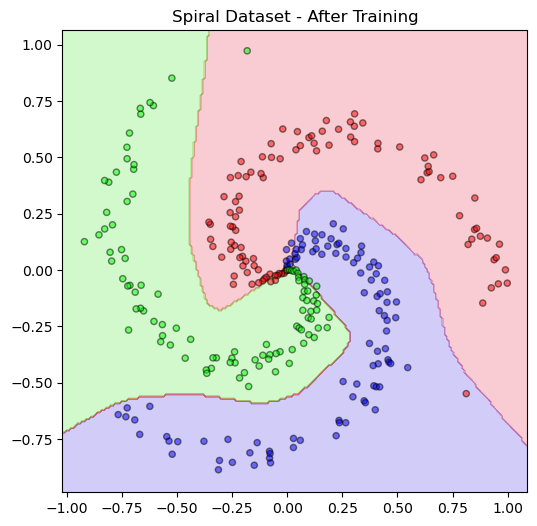

In [36]:
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons,
                 weights_regularizer_l1=0, weights_regularizer_l2=0,
                 biases_regularizer_l1=0, biases_regularizer_l2=0):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        self.weights_regularizer_l1 = weights_regularizer_l1
        self.weights_regularizer_l2 = weights_regularizer_l2
        self.biases_regularizer_l1 = biases_regularizer_l1
        self.biases_regularizer_l2 = biases_regularizer_l2

    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.dot(inputs, self.weights) + self.biases

    def backward(self, dvalues):
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)

        if self.weights_regularizer_l1 > 0:
            dL1 = np.ones_like(self.weights)
            dL1[self.weights < 0] = -1
            self.dweights += self.weights_regularizer_l1 * dL1
        if self.weights_regularizer_l2 > 0:
            self.dweights += 2 * self.weights_regularizer_l2 * self.weights

        if self.biases_regularizer_l1 > 0:
            dL1_b = np.ones_like(self.biases)
            dL1_b[self.biases < 0] = -1
            self.dbiases += self.biases_regularizer_l1 * dL1_b
        if self.biases_regularizer_l2 > 0:
            self.dbiases += 2 * self.biases_regularizer_l2 * self.biases

        self.dinputs = np.dot(dvalues, self.weights.T)

class Activation_ReLU:
    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.maximum(0, inputs)

    def backward(self, dvalues):
        self.dinputs = dvalues.copy()
        self.dinputs[self.inputs <= 0] = 0

class Loss:
    def remember_trainable_layers(self, trainable_layers):
        self.trainable_layers = trainable_layers

    def calculate(self, output, y, *, include_regularization=False):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        if not include_regularization:
            return data_loss
        return data_loss, self.regularization_loss()

    def regularization_loss(self):
        regularization_loss = 0
        for layer in self.trainable_layers:
            if layer.weights_regularizer_l1 > 0:
                regularization_loss += layer.weights_regularizer_l1 * np.sum(np.abs(layer.weights))
            if layer.weights_regularizer_l2 > 0:
                regularization_loss += layer.weights_regularizer_l2 * np.sum(layer.weights**2)
            if layer.biases_regularizer_l1 > 0:
                regularization_loss += layer.biases_regularizer_l1 * np.sum(np.abs(layer.biases))
            if layer.biases_regularizer_l2 > 0:
                regularization_loss += layer.biases_regularizer_l2 * np.sum(layer.biases**2)
        return regularization_loss

class Loss_CategoricalCrossentropy(Loss):
    def forward(self, y_pred, y_true):
        samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples), y_true]
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped * y_true, axis=1)
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

    def backward(self, dvalues, y_true):
        samples = len(dvalues)
        labels = len(dvalues[0])
        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true]
        self.dinputs = -y_true / dvalues
        self.dinputs = self.dinputs / samples

class Activation_Softmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities

    def backward(self, dvalues):
        self.dinputs = np.empty_like(dvalues)
        for index, (single_output, single_dvalue) in enumerate(zip(self.output, dvalues)):
            single_output = single_output.reshape(-1, 1)
            jacobian_matrix = np.diagflat(single_output) - np.dot(single_output, single_output.T)
            self.dinputs[index] = np.dot(jacobian_matrix, single_dvalue)

class Activation_Softmax_Loss_CategoricalCrossentropy:
    def __init__(self):
        self.activation = Activation_Softmax()
        self.loss = Loss_CategoricalCrossentropy()

    def forward(self, inputs, y_true):
        self.activation.forward(inputs)
        self.output = self.activation.output
        return self.loss.calculate(self.output, y_true, include_regularization=True)

    def backward(self, dvalues, y_true):
        samples = len(dvalues)
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)
        self.dinputs = dvalues.copy()
        self.dinputs[range(samples), y_true] -= 1
        self.dinputs = self.dinputs / samples

class Optimizer_Adam:
    def __init__(self, learning_rate=0.001, decay=0., epsilon=1e-7, beta_1=0.9, beta_2=0.999):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        self.beta_1 = beta_1
        self.beta_2 = beta_2

    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * \
                (1. / (1. + self.decay * self.iterations))

    def update_params(self, layer):
        if not hasattr(layer, 'weight_cache'):
            layer.weight_momentums = np.zeros_like(layer.weights)
            layer.bias_momentums = np.zeros_like(layer.biases)
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.biases)

        layer.weight_momentums = self.beta_1 * layer.weight_momentums + \
                                 (1 - self.beta_1) * layer.dweights
        layer.bias_momentums = self.beta_1 * layer.bias_momentums + \
                               (1 - self.beta_1) * layer.dbiases

        weight_momentums_corrected = layer.weight_momentums / \
            (1 - self.beta_1**(self.iterations+1))
        bias_momentums_corrected = layer.bias_momentums / \
            (1 - self.beta_1**(self.iterations+1))

        layer.weight_cache = self.beta_2 * layer.weight_cache + \
                             (1 - self.beta_2) * layer.dweights**2
        layer.bias_cache = self.beta_2 * layer.bias_cache + \
                           (1 - self.beta_2) * layer.dbiases**2

        weight_cache_corrected = layer.weight_cache / \
            (1 - self.beta_2**(self.iterations+1))
        bias_cache_corrected = layer.bias_cache / \
            (1 - self.beta_2**(self.iterations+1))

        layer.weights += -self.current_learning_rate * weight_momentums_corrected / \
                         (np.sqrt(weight_cache_corrected) + self.epsilon)
        layer.biases += -self.current_learning_rate * bias_momentums_corrected / \
                        (np.sqrt(bias_cache_corrected) + self.epsilon)

    def post_update_params(self):
        self.iterations += 1


def spiral_data(samples, classes):
    X = np.zeros((samples*classes, 2))
    y = np.zeros(samples*classes, dtype='uint8')
    for class_number in range(classes):
        ix = range(samples*class_number, samples*(class_number+1))
        r = np.linspace(0.0, 1, samples)
        t = np.linspace(class_number*4, (class_number+1)*4, samples) + np.random.randn(samples)*0.2
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        y[ix] = class_number
    return X, y

# Generate spiral data
X, y = spiral_data(samples=100, classes=3)

# Visualize the data before training
plt.figure(figsize=(6,6))
plt.title("Spiral Dataset - Before Training")
plt.scatter(X[:,0], X[:,1], c=y, cmap='brg', s= 20, alpha= 0.5)
plt.show()

# Create layers with L2 regularization
dense1 = Layer_Dense(2, 64, weights_regularizer_l2=1e-4)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(64, 3, weights_regularizer_l2=1e-4)

loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()
optimizer = Optimizer_Adam(learning_rate=0.02, decay=1e-5)

loss_activation.loss.remember_trainable_layers([dense1, dense2])

# Train in loop
for epoch in range(100):
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    data_loss, reg_loss = loss_activation.forward(dense2.output, y)
    loss = data_loss + reg_loss

    predictions = np.argmax(loss_activation.output, axis=1)
    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy = np.mean(predictions == y)

    if not epoch % 1000:
        print(f'epoch: {epoch}, acc: {accuracy:.3f}, loss: {loss:.3f}, lr: {optimizer.current_learning_rate}')

    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

# Visualize the data after training by plotting decision boundary
# Create a grid of points
h = 0.01
x_min, x_max = X[:,0].min()-0.1, X[:,0].max()+0.1
y_min, y_max = X[:,1].min()-0.1, X[:,1].max()+0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

grid_points = np.c_[xx.ravel(), yy.ravel()]

# Forward pass through the trained model
dense1.forward(grid_points)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
Z = np.argmax(dense2.output, axis=1)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(6,6))
plt.title("Spiral Dataset - After Training")
plt.contourf(xx, yy, Z, cmap='brg', alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='brg', s=20, edgecolors='k', alpha= 0.5)
plt.show()

## c. MNIST

Epoch 1, Loss: 2.302, Accuracy: 0.089


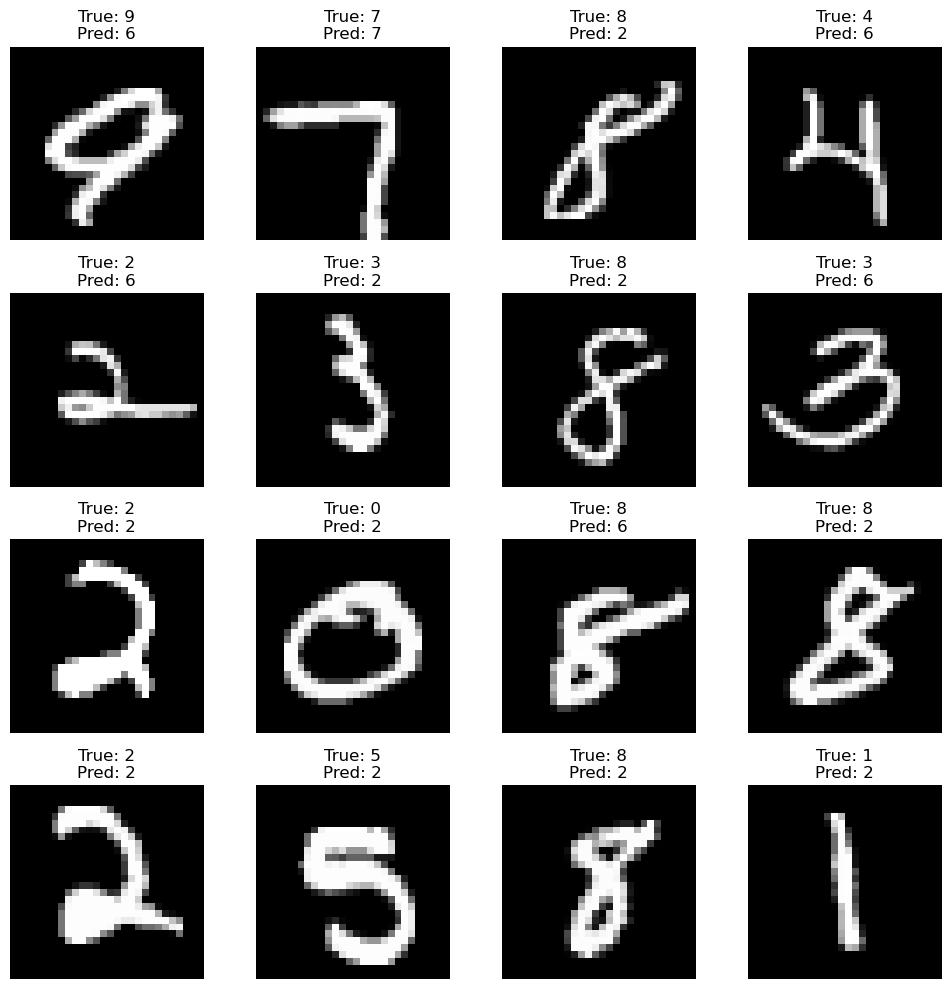

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Dense layer implementation
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons, weights_regularizer_l1=0, weights_regularizer_l2=0,
                 biases_regularizer_l1=0, biases_regularizer_l2=0):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        self.weights_regularizer_l1 = weights_regularizer_l1
        self.weights_regularizer_l2 = weights_regularizer_l2
        self.biases_regularizer_l1 = biases_regularizer_l1
        self.biases_regularizer_l2 = biases_regularizer_l2

    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.dot(inputs, self.weights) + self.biases

    def backward(self, dvalues):
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)

        # L1 on weights
        if self.weights_regularizer_l1 > 0:
            dL1 = np.ones_like(self.weights)
            dL1[self.weights < 0] = -1
            self.dweights += self.weights_regularizer_l1 * dL1
        # L2 on weights
        if self.weights_regularizer_l2 > 0:
            self.dweights += 2 * self.weights_regularizer_l2 * self.weights

        # L1 on biases
        if self.biases_regularizer_l1 > 0:
            dL1_b = np.ones_like(self.biases)
            dL1_b[self.biases < 0] = -1
            self.dbiases += self.biases_regularizer_l1 * dL1_b
        # L2 on biases
        if self.biases_regularizer_l2 > 0:
            self.dbiases += 2 * self.biases_regularizer_l2 * self.biases

        self.dinputs = np.dot(dvalues, self.weights.T)


class Activation_ReLU:
    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.maximum(0, inputs)

    def backward(self, dvalues):
        self.dinputs = dvalues.copy()
        self.dinputs[self.inputs <= 0] = 0


class Activation_SoftMax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        self.output = exp_values / np.sum(exp_values, axis=1, keepdims=True)

    def backward(self, dvalues):
        self.dinputs = dvalues


class Loss:
    def remember_trainable_layers(self, trainable_layers):
        self.trainable_layers = trainable_layers

    def calculate(self, output, y, *, include_regularization=False):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        if not include_regularization:
            return data_loss

        return data_loss + self.regularization_loss()

    def regularization_loss(self):
        regularization_loss = 0
        for layer in self.trainable_layers:
            if layer.weights_regularizer_l1 > 0:
                regularization_loss += layer.weights_regularizer_l1 * np.sum(np.abs(layer.weights))
            if layer.weights_regularizer_l2 > 0:
                regularization_loss += layer.weights_regularizer_l2 * np.sum(layer.weights**2)

            if layer.biases_regularizer_l1 > 0:
                regularization_loss += layer.biases_regularizer_l1 * np.sum(np.abs(layer.biases))
            if layer.biases_regularizer_l2 > 0:
                regularization_loss += layer.biases_regularizer_l2 * np.sum(layer.biases**2)

        return regularization_loss


class Loss_CategoricalCrossentropy(Loss):
    def forward(self, y_pred, y_true):
        samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples), y_true]
        else:
            correct_confidences = np.sum(y_pred_clipped * y_true, axis=1)
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

    def backward(self, dvalues, y_true):
        samples = len(dvalues)
        labels = len(dvalues[0])
        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true]
        self.dinputs = -y_true / dvalues
        self.dinputs = self.dinputs / samples


class Optimizer_Adam:
    def __init__(self, learning_rate=0.001, decay=0., epsilon=1e-7, beta_1=0.9, beta_2=0.999):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        self.beta_1 = beta_1
        self.beta_2 = beta_2

    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))

    def update_params(self, layer):
        if not hasattr(layer, 'weight_cache'):
            layer.weight_momentums = np.zeros_like(layer.weights)
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_momentums = np.zeros_like(layer.biases)
            layer.bias_cache = np.zeros_like(layer.biases)

        layer.weight_momentums = self.beta_1 * layer.weight_momentums + (1 - self.beta_1) * layer.dweights
        layer.bias_momentums = self.beta_1 * layer.bias_momentums + (1 - self.beta_1) * layer.dbiases

        weight_momentums_corrected = layer.weight_momentums / (1 - self.beta_1 ** (self.iterations + 1))
        bias_momentums_corrected = layer.bias_momentums / (1 - self.beta_1 ** (self.iterations + 1))

        layer.weight_cache = self.beta_2 * layer.weight_cache + (1 - self.beta_2) * layer.dweights**2
        layer.bias_cache = self.beta_2 * layer.bias_cache + (1 - self.beta_2) * layer.dbiases**2

        weight_cache_corrected = layer.weight_cache / (1 - self.beta_2 ** (self.iterations + 1))
        bias_cache_corrected = layer.bias_cache / (1 - self.beta_2 ** (self.iterations + 1))

        layer.weights += -self.current_learning_rate * weight_momentums_corrected / (np.sqrt(weight_cache_corrected) + self.epsilon)
        layer.biases += -self.current_learning_rate * bias_momentums_corrected / (np.sqrt(bias_cache_corrected) + self.epsilon)

    def post_update_params(self):
        self.iterations += 1


class Activation_Softmax_Loss_CategoricalCrossEntropy(Loss):
    def predictions(self, outputs):
        return outputs
    def calculate(self,output,y, *, include_regularization = False):
        sample_losses = self.forward(output,y)
        data_loss = np.mean(sample_losses)

        if not include_regularization:
            return data_loss
        return data_loss, self.regularization_loss() 
    def remember_trainable_layers(self, trainable_layers):
        self.trainable_layers = trainable_layers
    def __init__(self):
        self.activation = Activation_SoftMax()
        self.loss = Loss_CategoricalCrossentropy()
    def forward(self, inputs, y_true):
        self.activation.forward(inputs)
        self.output = self.activation.output
        return self.loss.calculate(self.output, y_true)
    
    def backward(self, dvalues, y_true):
        samples = len(dvalues)
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis =1)
        self.dinputs = dvalues.copy()
        self.dinputs[range(samples), y_true] -= 1
        self.dinputs = self.dinputs / samples

    def regularization_loss(self):
        regularization_loss = 0
        for layer in self.trainable_layers:
            if (layer.weights_regularizer_l1 > 0):
                regularization_loss += layer.weights_regularizer_l1 * np.sum(np.abs(layer.weights))
            if (layer.weights_regularizer_l2 > 0):
                regularization_loss += layer.weights_regularizer_l2 * np.sum(layer.weights**2)
            if (layer.biases_regularizer_l1 > 0):
                regularization_loss += layer.biases_regularizer_l1 * np.sum(np.abs(layer.biases))
            if (layer.biases_regularizer_l2 > 0):
                regularization_loss += layer.biases_regularizer_l2 * np.sum(layer.biases**2)

        return regularization_loss


def load_mnist(file_path):
    data = np.loadtxt(file_path, delimiter=",", skiprows=0)
    X, y = data[:, 1:], data[:, 0].astype(int)
    return X, y

X_train, y_train = load_mnist('mnist_train.csv')
X_test, y_test = load_mnist('mnist_test.csv')

X_train = X_train / 255.0
X_test = X_test / 255.0

# Model definition
input_dim = X_train.shape[1]
dense1 = Layer_Dense(input_dim, 128, weights_regularizer_l2=1e-4)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(128, 10, weights_regularizer_l2=1e-4)
softmax_cross_entropy = Activation_Softmax_Loss_CategoricalCrossEntropy()
optimizer = Optimizer_Adam(learning_rate=0.01)

# Trainable layers
softmax_cross_entropy.loss.remember_trainable_layers([dense1, dense2])

# Training loop
epochs = 1
for epoch in range(epochs):
    dense1.forward(X_train)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    loss = softmax_cross_entropy.forward(dense2.output, y_train)

    predictions = np.argmax(softmax_cross_entropy.output, axis=1)
    accuracy = np.mean(predictions == y_train)
    print(f"Epoch {epoch + 1}, Loss: {loss:.3f}, Accuracy: {accuracy:.3f}")

    softmax_cross_entropy.backward(dense2.output, y_train)
    dense2.backward(softmax_cross_entropy.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

# Visualization
def visualize(images, labels, predictions=None, num_samples=10):
    indices = np.random.choice(len(images), num_samples, replace=False)
    images = images[indices]
    labels = labels[indices]
    predictions = predictions[indices] if predictions is not None else None
    grid_size = int(np.ceil(np.sqrt(num_samples)))

    plt.figure(figsize=(10, 10))
    for i in range(num_samples):
        plt.subplot(grid_size, grid_size, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap="gray")
        title = f"True: {labels[i]}"
        if predictions is not None:
            title += f"\nPred: {predictions[i]}"
        plt.title(title)
        plt.axis("off")
    plt.tight_layout()
    plt.show()

# Evaluate and visualize results
dense1.forward(X_test)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
y_pred = np.argmax(dense2.output, axis=1)
visualize(X_test, y_test, predictions=y_pred, num_samples=16)
